# Here is the notebook to generate the plots for the network of figure 13 in the paper


In [1]:
from graph_solver import Graph,solve_graph
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define a function to create the graph
def create_graph(Diff,length,r1to2,r2to1,r2to3,r3to2,velocity):
    num_species=3
    Diff_mat=np.full((num_species,),Diff)
    Velocity_mat=np.full((num_species,),0.)
    length=1.

    reaction_mat1=np.array([[-r1to2,r1to2,0],[r2to1,-r2to1,0],[0,0,0]])
    reaction_mat2=np.array([[0,0,0],[0,-r2to3,r2to3],[0,r3to2,-r3to2]])


    g=Graph(Diff_mat,Velocity_mat)
    g.add_node(0)
    g.add_node(1)
    g.add_node(2,reaction_mat1)
    g.add_node(3,reaction_mat2)
    g.add_node(4)
    g.add_exit_node(5)

    g.add_edge(0,1,length)
    g.add_edge(1,2,length)
    g.add_edge(1,3,length)
    g.add_edge(2,4,length)
    g.add_edge(3,4,length)
    g.add_edge(4,1,length,velocities=np.full((num_species,),velocity))
    g.add_edge(4,5,length)
    return g

graphcolor='black' # make the graphs black

# Here we display the graph

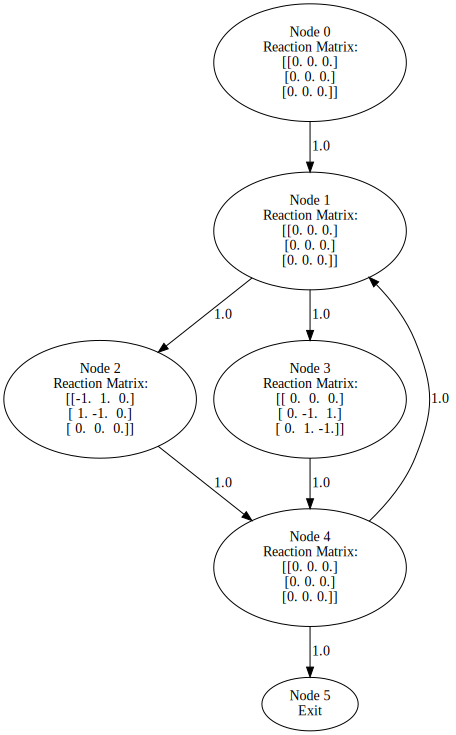

In [3]:
Diff=2
length=1.
velocity=1.
r1to2=1.
r2to1=1.
r2to3=1.
r3to2=1.
g=create_graph(Diff,length,r1to2,r2to1,r2to3,r3to2,velocity)
g.display()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


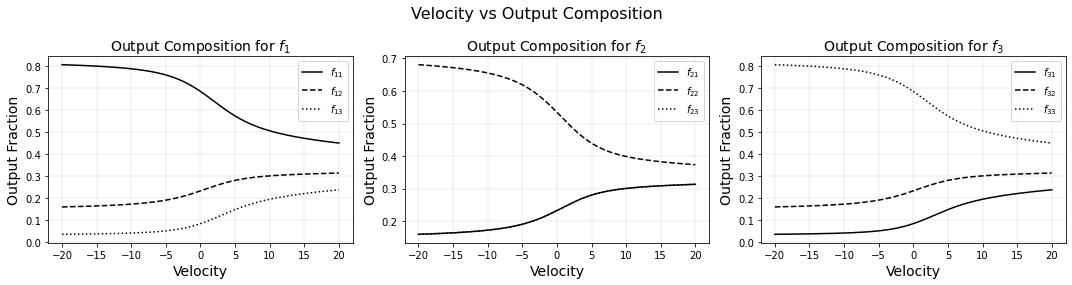

In [4]:
Diff=2
length=1.
velocity=1.
r1to2=1.
r2to1=1.
r2to3=1.
r3to2=1.

start = -20.
finish = 20.
n = 500  # number of points to plot

ls = np.linspace(start, finish, n)

# Perform an initial computation to determine the size of the output array
initial_g = create_graph(Diff,length,r1to2,r2to1,r2to3,r3to2,ls[0])
initial_out = solve_graph(initial_g)[0]
n_rows, n_cols = initial_out.shape

# Initialize a list of lists to store the outputs for each position in the output array
output_values = [[[] for _ in range(n_cols)] for _ in range(n_rows)]

# Find output composition for each point in ls
for l in ls:
    g = create_graph(Diff,length,r1to2,r2to1,r2to3,r3to2,l)
    out = solve_graph(g)[0]

    for i in range(n_rows):
        for j in range(n_cols):
            output_values[i][j].append(out[i, j])

line_styles = ['-', '--', ':', '-.']

fig, axs = plt.subplots(1, n_rows, figsize=(n_rows*5, 4), squeeze=False)
fig.suptitle('Velocity vs Output Composition', fontsize=16)

for i in range(n_rows):
    for j in range(n_cols):
        line_style = line_styles[j % len(line_styles)]
        label = r'$f_{{{}{}}}$'.format(i+1, j+1)

        axs[0, i].plot(ls, output_values[i][j], label=label, linestyle=line_style, color=graphcolor)
        axs[0, i].set_title(r'Output Composition for $f_{}$'.format(i+1),fontsize=14)
        axs[0, i].set_xlabel('Velocity',fontsize=14)
        axs[0, i].set_ylabel('Output Fraction',fontsize=14)

    axs[0, i].legend()
    axs[0,i].grid(True, linestyle='--', linewidth=0.2, color='gray')

plt.tight_layout()
plt.savefig('velocity.eps',bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


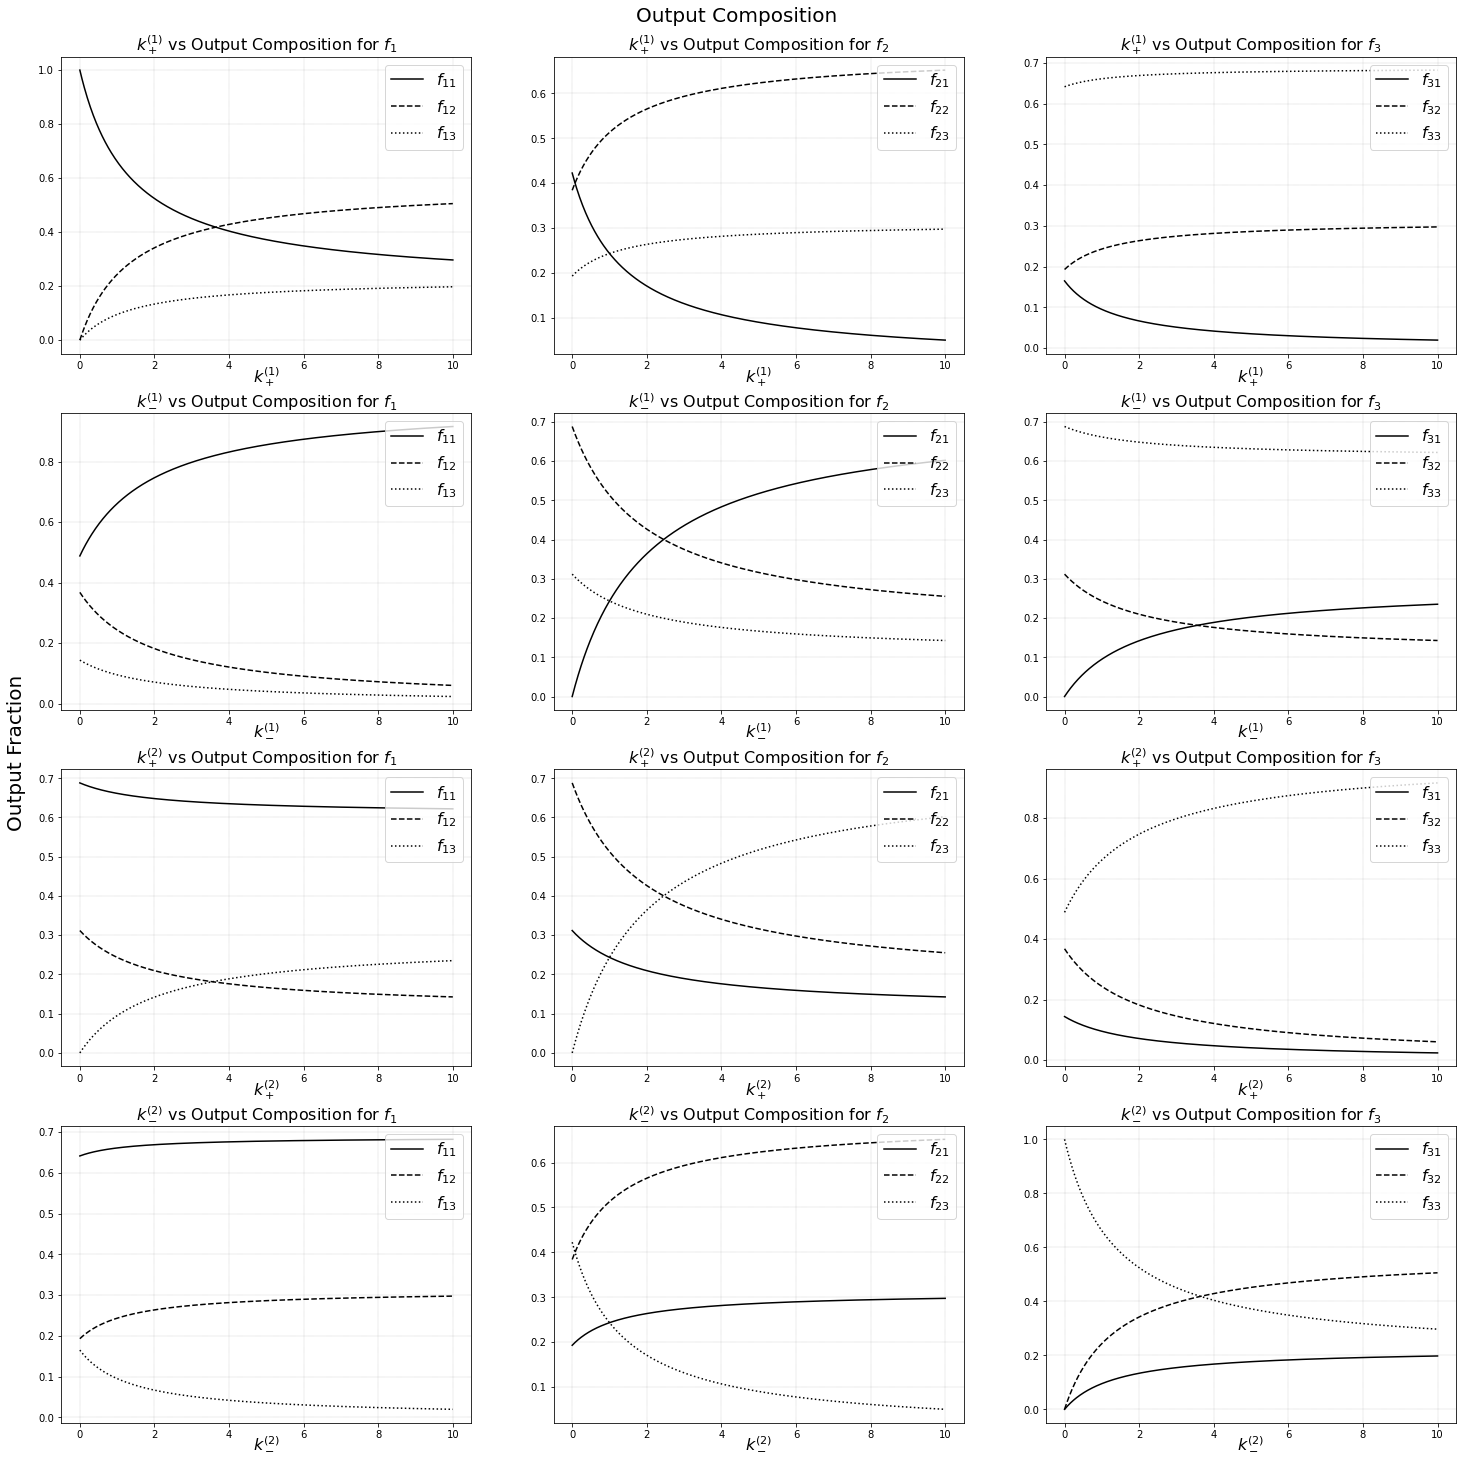

In [5]:
subtitle_size=16
legend_size=14
x_label_size=16


Diff=2
length=1.
velocity=1.
r1to2=1.
r2to1=1.
r2to3=1.
r3to2=1.

start = 0.
finish = 10.
n = 500

ls = np.linspace(start, finish, n)

initial_g = create_graph(Diff,length,ls[0],r2to1,r2to3,r3to2,velocity)
initial_out = solve_graph(initial_g)[0]
n_rows, n_cols = initial_out.shape

output_values = [[[] for _ in range(n_cols)] for _ in range(n_rows)]

for l in ls:
    g = create_graph(Diff,length,l,r2to1,r2to3,r3to2,velocity)
    out = solve_graph(g)[0]

    for i in range(n_rows):
        for j in range(n_cols):
            output_values[i][j].append(out[i, j])

line_styles = ['-', '--', ':', '-.']

fig, axs = plt.subplots(4, n_rows, figsize=(25, 23), squeeze=False)
fig.suptitle('Output Composition', fontsize=20)


for i in range(n_rows):
    for j in range(n_cols):
        line_style = line_styles[j % len(line_styles)]
        label = r'$f_{{{}{}}}$'.format(i+1, j+1)

        axs[0, i].plot(ls, output_values[i][j], label=label, linestyle=line_style, color=graphcolor)
        axs[0, i].set_title(r'$k_+^{{(1)}}$ vs Output Composition for $f_{}$'.format(i+1),fontsize=subtitle_size)
        axs[0, i].set_xlabel(r'$k_+^{(1)}$',fontsize=x_label_size)

    axs[0,i].grid(True, linestyle='--', linewidth=0.2, color='gray')
    axs[0, i].legend(fontsize=16,loc='upper right')



initial_g = create_graph(Diff,length,r1to2,ls[0],r2to3,r3to2,velocity)
initial_out = solve_graph(initial_g)[0]
n_rows, n_cols = initial_out.shape

output_values = [[[] for _ in range(n_cols)] for _ in range(n_rows)]

for l in ls:
    g = create_graph(Diff,length,r1to2,l,r2to3,r3to2,velocity)
    out = solve_graph(g)[0]

    for i in range(n_rows):
        for j in range(n_cols):
            output_values[i][j].append(out[i, j])

line_styles = ['-', '--', ':', '-.']


for i in range(n_rows):
    for j in range(n_cols):
        line_style = line_styles[j % len(line_styles)]
        label = r'$f_{{{}{}}}$'.format(i+1, j+1)

        axs[1, i].plot(ls, output_values[i][j], label=label, linestyle=line_style, color=graphcolor)
        axs[1, i].set_title(r'$k_-^{{(1)}}$ vs Output Composition for $f_{}$'.format(i+1),fontsize=subtitle_size)
        axs[1, i].set_xlabel(r'$k_-^{(1)}$',fontsize=x_label_size)

    axs[1,i].grid(True, linestyle='--', linewidth=0.2, color='gray')
    axs[1, i].legend(fontsize=16,loc='upper right')



initial_g = create_graph(Diff,length,r1to2,r2to1,ls[0],r3to2,velocity)
initial_out = solve_graph(initial_g)[0]
n_rows, n_cols = initial_out.shape

output_values = [[[] for _ in range(n_cols)] for _ in range(n_rows)]

for l in ls:
    g = create_graph(Diff,length,r1to2,r2to1,l,r3to2,velocity)
    out = solve_graph(g)[0]

    for i in range(n_rows):
        for j in range(n_cols):
            output_values[i][j].append(out[i, j])

line_styles = ['-', '--', ':', '-.']


for i in range(n_rows):
    for j in range(n_cols):
        line_style = line_styles[j % len(line_styles)]
        label = r'$f_{{{}{}}}$'.format(i+1, j+1)

        axs[2, i].plot(ls, output_values[i][j], label=label, linestyle=line_style, color=graphcolor)
        axs[2, i].set_title(r'$k_+^{{(2)}}$ vs Output Composition for $f_{}$'.format(i+1),fontsize=subtitle_size)
        axs[2, i].set_xlabel(r'$k_+^{(2)}$',fontsize=x_label_size)

    axs[2,i].grid(True, linestyle='--', linewidth=0.2, color='gray')
    axs[2, i].legend(fontsize=16,loc='upper right')


initial_g = create_graph(Diff,length,r1to2,r2to1,r2to3,ls[0],velocity)
initial_out = solve_graph(initial_g)[0]
n_rows, n_cols = initial_out.shape

output_values = [[[] for _ in range(n_cols)] for _ in range(n_rows)]

for l in ls:
    g = create_graph(Diff,length,r1to2,r2to1,r2to3,l,velocity)
    out = solve_graph(g)[0]

    for i in range(n_rows):
        for j in range(n_cols):
            output_values[i][j].append(out[i, j])

line_styles = ['-', '--', ':', '-.']


for i in range(n_rows):
    for j in range(n_cols):
        line_style = line_styles[j % len(line_styles)]
        label = r'$f_{{{}{}}}$'.format(i+1, j+1)

        axs[3, i].plot(ls, output_values[i][j], label=label, linestyle=line_style, color=graphcolor)
        axs[3, i].set_title(r'$k_-^{{(2)}}$ vs Output Composition for $f_{}$'.format(i+1),fontsize=subtitle_size)
        axs[3, i].set_xlabel(r'$k_-^{(2)}$',fontsize=x_label_size)

    axs[3,i].grid(True, linestyle='--', linewidth=0.2, color='gray')
    axs[3, i].legend(fontsize=16,loc='upper right')

for i in range(4):
    for j in range(3):
        axs[i, j].xaxis.set_label_coords(0.5, -0.040)

fig.text(0.095, 0.53, 'Output Fraction', va='center', rotation='vertical', fontsize=20)
plt.subplots_adjust(top=.95)
plt.savefig('multiple_output.eps',bbox_inches='tight')
plt.show()